# Kaggle Competition: Binary Classification with a Bank Churn Dataset

### Setup Imports and Variables

In [14]:
import pandas as pd
import seaborn as sns

### Explore the Data
Understand the data:

In [15]:
df_train = pd.read_csv("/Users/leow/Desktop/playground-series-s4e1/train.csv")
df_test = pd.read_csv("/Users/leow/Desktop/playground-series-s4e1/test.csv")
df_train.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Age', ylabel='IsActiveMember'>

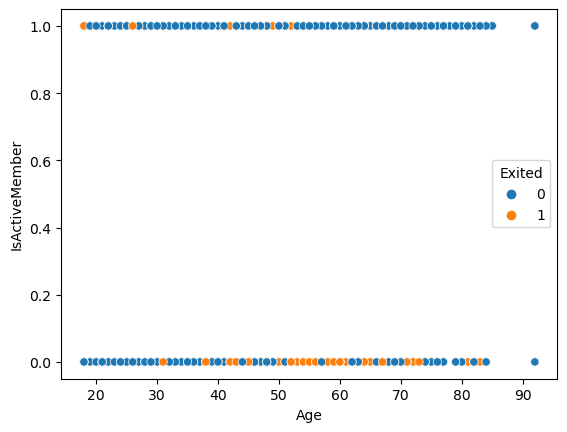

In [8]:
sns.scatterplot(data=df1,x='Age',y='IsActiveMember',hue="Exited",)

### Data Preparation for Machine Learning

In [16]:
df_train = df_train.drop(columns = ['id','CustomerId','Surname'])
df_test = df_test.drop(columns = ['id','CustomerId','Surname'])

In [17]:
X = df_train.iloc[:,0:-1]
y = df_train['Exited']
y.value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

In [20]:
new_X = pd.get_dummies(X) 
df_test = pd.get_dummies(df_test, columns=['Geography', 'Gender'])

### KNN Model: Training

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_X)
new_X_2 = scaler.transform(new_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X_2, y, test_size = 0.3, stratify=y, random_state=200)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

### Evaluate Model Accuracy

In [23]:
from sklearn.metrics import accuracy_score
print('Training Acc.:',accuracy_score(y_train,y_pred_knn_train))
print('Testing Acc.:',accuracy_score(y_test,y_pred_knn_test))

from sklearn.metrics import recall_score, precision_score
print(f'\nRecall:', recall_score(y_train,y_pred_knn_train))
print('Precision:', precision_score(y_test,y_pred_knn_test))

Training Acc.: 0.8850012551613099
Testing Acc.: 0.8482963381874735

Recall: 0.6233176518715484
Precision: 0.6795011502603221


### KNN Model: Prediction

In [28]:
# Test for predict
X_predict = df_test.copy()
new_X_predict = pd.get_dummies(X_predict)
print(f'{new_X_predict.columns}\n{new_X.columns}') # check if equal to new_X

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


In [29]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(new_X)
new_X_2 = scaler.transform(new_X)
new_X_predict_s = scaler.transform(new_X_predict)

y_predict = knn.predict(new_X_predict_s)
y_predict

array([0, 1, 0, ..., 0, 0, 0])

In [30]:
# turn to probability
y_predict_proba = knn.predict_proba(new_X_predict_s)
result_arr = y_predict_proba[:,1]
result_arr

array([0. , 1. , 0. , ..., 0. , 0.2, 0. ])

In [31]:
# answer the kaggle question
df2['Exited'] = result_arr
df_result = df2[['id','Exited']]
df_result

,id,Exited
0,165034,0.0
1,165035,1.0
2,165036,0.0
3,165037,0.0
4,165038,0.4
...,...,...
110018,275052,0.0
110019,275053,0.0
110020,275054,0.0
110021,275055,0.2
